# Problem Description

Learning about tree-based methods and interpretability of ML models. The focus here should be to get a just-good-enough model and interpret the relationship between the target and top predictors
Porto Seguro dataset, you should beat the random forest benchmark (0.245 on Kaggle)
Reference: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

## Initial setup

In [193]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
#conda install -c conda-forge lightgbm
#pip install xgboost
#!brew install libomp

In [195]:
#imports
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os

In [196]:
PATH = "Data/porto_seguro_safe_driver_prediction/"

In [197]:
pd.options.display.max_rows=None
pd.options.display.max_columns = None

As mentioned in the description,Values of -1 indicate that the feature was missing from the observation

In [198]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False, na_values= '-1')

## Exploratory Data Analysis

In [199]:
df_raw.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [200]:
df_raw.tail(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1.0,10,0.0,0.0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10.0,1.0,NaN,0,1.0,1,1.0,1,0.0,1,31,3.0,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1.0,3,0.0,0.0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9.0,1.0,NaN,0,NaN,15,0.0,0,2.0,1,63,2.0,0.387298,0.972145,NaN,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1.0,10,0.0,0.0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,1,31,3.0,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2.0,3,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,101,3.0,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1.0,8,0.0,0.0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,NaN,7.0,0.0,NaN,0,NaN,0,1.0,0,2.0,1,34,2.0,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


Count of dependent variable('target') with value 0

In [201]:
np.count_nonzero(df_raw['target'], axis=0)
#Count of target=0

21694

Count of dependent variable('target') with value 1

In [202]:
(df_raw['target'] == 0).sum(axis=0)#Count of target=0

573518

In [203]:
df_raw.shape

(595212, 59)

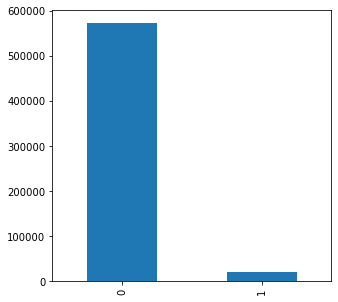

In [204]:
df_raw['target'].value_counts().plot(kind='bar', figsize=(5,5));

## Preprocessing

In [205]:
train_df_copy = df_raw.copy()

In [206]:
train_df_copy.columns.values

array(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07',
       'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_

### Check for duplicate columns

In [207]:
train_df_copy.columns.value_counts()

ps_ind_01         1
ps_calc_15_bin    1
ps_calc_08        1
ps_calc_10        1
ps_calc_09        1
ps_car_03_cat     1
ps_calc_18_bin    1
ps_ind_10_bin     1
ps_calc_11        1
ps_calc_12        1
ps_ind_04_cat     1
ps_car_05_cat     1
ps_car_13         1
ps_calc_05        1
ps_ind_17_bin     1
ps_ind_05_cat     1
ps_ind_09_bin     1
ps_calc_16_bin    1
ps_car_11_cat     1
ps_reg_01         1
target            1
ps_car_02_cat     1
ps_ind_11_bin     1
ps_car_07_cat     1
ps_calc_13        1
ps_calc_04        1
ps_ind_08_bin     1
ps_ind_15         1
ps_ind_07_bin     1
ps_car_15         1
ps_ind_13_bin     1
ps_ind_16_bin     1
ps_calc_02        1
ps_car_09_cat     1
ps_ind_03         1
ps_calc_14        1
ps_car_14         1
ps_calc_01        1
ps_car_04_cat     1
ps_reg_03         1
ps_car_12         1
ps_ind_02_cat     1
ps_car_06_cat     1
ps_calc_19_bin    1
ps_calc_06        1
ps_car_10_cat     1
ps_ind_18_bin     1
ps_car_01_cat     1
ps_car_08_cat     1
ps_calc_07        1


### Identifies count of null or empty column values

In [208]:
df_raw.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


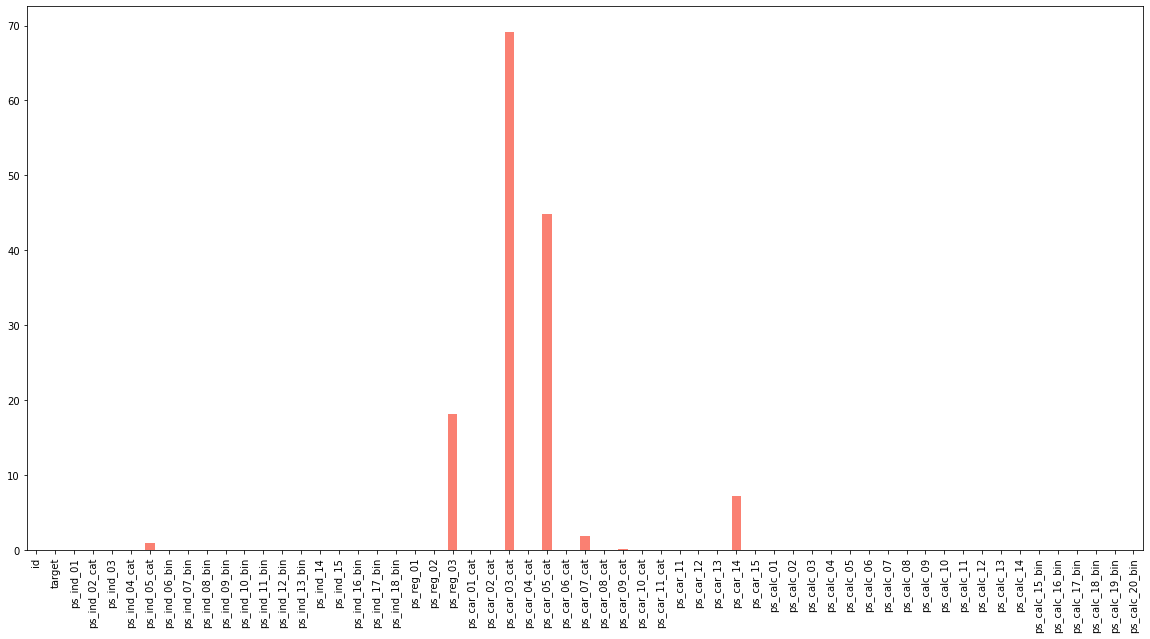

In [209]:
fig, ax = plt.subplots(figsize=(20,10))         
(train_df_copy.isna().sum()*100/len(train_df_copy)).round(2).plot(kind='bar', color='salmon');

In [210]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [211]:
train_df_copy.shape

(595212, 59)

In [212]:
train_df_copy.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


The model is unaware that missing values were replaced.

It is possible that knowledge of whether a row contains a missing value or not will be useful to the model when making a prediction.

One approach to exposing the model to this knowledge is by providing an additional column that is a binary flag indicating whether the row had a missing value or not.

    0: Row does not contain a missing value.
    1: Row contains a missing value (which was/will be imputed).

Ref: https://machinelearningmastery.com/binary-flags-for-missing-values-for-machine-learning/

In [213]:
train_df_copy['missing'] = pd.isnull(train_df_copy).any(axis=1)

In [214]:
(train_df_copy['missing'] == 0).sum(axis=0)#Count of missing=0

124931

In [215]:
(train_df_copy['missing'] == 1).sum(axis=0)#Count of missing=1

470281

In [216]:
train_df_copy.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [217]:
train_df_copy.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin', '

### Preprocess missing values

In [218]:
categorical_column =[]
categorical_missing_data=[]
not_categorical = []  
# train_target = []
# train_id = []

# add columns for replacement flags

def preprocess_data(data_df):
  data_df_copy = data_df.copy()

  if 'target' in data_df.columns:
    train_target = data_df.target
    data_df.drop(['target'], axis=1, inplace=True)
  if 'id' in data_df.columns:
    train_id = data_df.id
    data_df.drop(['id'], axis=1, inplace=True) 

  

  for label, content in data_df.items():    
    if '_cat'  in label:
      categorical_column.append(label)
      data_df[label].fillna(value=content.mode()[0], inplace=True)
      data_df[label] = data_df[label].astype('category')

    elif '_bin' in label:
      data_df[label].fillna(value=content.mode()[0], inplace=True)

    else:
      data_df[label].fillna(value=content.median(), inplace=True)
      not_categorical.append(label)    

    
  print(categorical_column)
  if 'target' in data_df_copy.columns:
    data_df.insert(loc=0, column='target', value=train_target)    
    # if (train_target.empty == True) :
      
  if ('id' in data_df_copy.columns):
    data_df.insert(loc=0, column='id', value= train_id)

  return data_df       

In [219]:
preprocessed_train_data = preprocess_data(train_df_copy)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


#### Sanity Check for NA feature values after replacement

In [220]:
preprocessed_train_data.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [221]:
preprocessed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 60 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   id              595212 non-null  int64   
 1   target          595212 non-null  int64   
 2   ps_ind_01       595212 non-null  int64   
 3   ps_ind_02_cat   595212 non-null  category
 4   ps_ind_03       595212 non-null  int64   
 5   ps_ind_04_cat   595212 non-null  category
 6   ps_ind_05_cat   595212 non-null  category
 7   ps_ind_06_bin   595212 non-null  int64   
 8   ps_ind_07_bin   595212 non-null  int64   
 9   ps_ind_08_bin   595212 non-null  int64   
 10  ps_ind_09_bin   595212 non-null  int64   
 11  ps_ind_10_bin   595212 non-null  int64   
 12  ps_ind_11_bin   595212 non-null  int64   
 13  ps_ind_12_bin   595212 non-null  int64   
 14  ps_ind_13_bin   595212 non-null  int64   
 15  ps_ind_14       595212 non-null  int64   
 16  ps_ind_15       595212 non-null  int64

In [222]:
preprocessed_train_data.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [223]:
preprocessed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 60 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   id              595212 non-null  int64   
 1   target          595212 non-null  int64   
 2   ps_ind_01       595212 non-null  int64   
 3   ps_ind_02_cat   595212 non-null  category
 4   ps_ind_03       595212 non-null  int64   
 5   ps_ind_04_cat   595212 non-null  category
 6   ps_ind_05_cat   595212 non-null  category
 7   ps_ind_06_bin   595212 non-null  int64   
 8   ps_ind_07_bin   595212 non-null  int64   
 9   ps_ind_08_bin   595212 non-null  int64   
 10  ps_ind_09_bin   595212 non-null  int64   
 11  ps_ind_10_bin   595212 non-null  int64   
 12  ps_ind_11_bin   595212 non-null  int64   
 13  ps_ind_12_bin   595212 non-null  int64   
 14  ps_ind_13_bin   595212 non-null  int64   
 15  ps_ind_14       595212 non-null  int64   
 16  ps_ind_15       595212 non-null  int64

In [224]:
len(preprocessed_train_data)

595212

In [225]:
shuffled_df = preprocessed_train_data

In [226]:
# # Extract Features and target

X = shuffled_df.drop(['target', 'id'], axis=1)
y=  shuffled_df['target']

len(categorical_column), len(categorical_missing_data), len(not_categorical)

(14, 0, 27)

### OneHotEncoding for categorical_columns

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [227]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = categorical_column
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

Inserts encoded columns for each of the categorical columns

In [229]:
transformed_x = transformer.fit_transform(X)
shuffled_df_encoded = pd.get_dummies(shuffled_df[categorical_column])

In [230]:
shuffled_df_encoded.head()

,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,ps_car_01_cat_0.0,ps_car_01_cat_1.0,ps_car_01_cat_2.0,ps_car_01_cat_3.0,ps_car_01_cat_4.0,ps_car_01_cat_5.0,ps_car_01_cat_6.0,ps_car_01_cat_7.0,ps_car_01_cat_8.0,ps_car_01_cat_9.0,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_0.0,ps_car_02_cat_1.0,ps_car_03_cat_0.0,ps_car_03_cat_1.0,ps_car_04_cat_0,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_05_cat_0.0,ps_car_05_cat_1.0,ps_car_06_cat_0,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0.0,ps_car_07_cat_1.0,ps_car_08_cat_0,ps_car_08_cat_1,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_0,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_1,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [231]:
shuffled_df.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,missing
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,1.0,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,True
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,1.0,0,1.0,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,True
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.801561,7.0,1.0,1.0,0,1.0,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,True
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0,False
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,1.0,0,1.0,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0,True
5,19,0,5,1.0,4,0.0,0.0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10.0,0.0,1.0,0,0.0,14,1.0,1,0.0,1,104,2.0,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1,True
6,20,0,2,1.0,3,1.0,0.0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6.0,1.0,1.0,0,1.0,11,1.0,1,0.0,1,99,2.0,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0,True
7,22,0,5,1.0,4,0.0,0.0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11.0,1.0,0.0,0,0.0,11,1.0,1,2.0,1,30,3.0,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0,False
8,26,0,5,1.0,3,1.0,0.0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10.0,1.0,1.0,0,1.0,14,1.0,1,0.0,1,68,3.0,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1,True
9,28,1,1,1.0,2,0.0,0.0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11.0,0.0,0.0,1,0.0,14,1.0,1,2.0,1,104,2.0,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0,False


Removes old categorical columns to avoid multicollinearity

In [232]:
shuffled_cat_dropped = shuffled_df.drop(categorical_column, axis=1)
shuffled_cat_dropped.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,missing
0,7,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,True
1,9,0,1,7,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,True
2,13,0,5,9,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.801561,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,True
3,16,0,0,2,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0,False
4,17,0,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0,True


Adds one-hot encoded columns

In [233]:
shuffled_upd = pd.concat([shuffled_cat_dropped, shuffled_df_encoded], axis=1)

In [234]:
X = shuffled_upd.drop(['target', 'id'], axis=1)
y=  shuffled_upd['target']

In [235]:
X.describe()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,ps_car_01_cat_0.0,ps_car_01_cat_1.0,ps_car_01_cat_2.0,ps_car_01_cat_3.0,ps_car_01_cat_4.0,ps_car_01_cat_5.0,ps_car_01_cat_6.0,ps_car_01_cat_7.0,ps_car_01_cat_8.0,ps_car_01_cat_9.0,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_0.0,ps_car_02_cat_1.0,ps_car_03_cat_0.0,ps_car_03_cat_1.0,ps_car_04_cat_0,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_05_cat_0.0,ps_car_05_cat_1.0,ps_car_06_cat_0,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0.0,ps_car_07_cat_1.0,ps_car_08_cat_0,ps_car_08_cat_1,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_0,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_1,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000

In [236]:
y.describe()

count    595212.000000
mean          0.036448
std           0.187401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

## Model Train

Reference:https://towardsdatascience.com/data-science-quick-tip-003-using-scikit-learn-pipelines-66f652f26954

In [237]:
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

Normally distributes data using StandardScaler

In [238]:
X = StandardScaler().fit_transform(X)
# for XGBoost no need of scaling
# more relavant for linear models

In [239]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
0,0.050218,0.213594,-0.805893,1.700163,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.043440,-1.395821,2.694238,-0.425746,0.309442,-0.591654,-0.506132,-0.415746,0.343963,0.313526,-0.086358,0.737869,0.523136,0.175713,-0.870090,0.562038,-0.780567,1.731646,-1.417981,0.530322,-1.073849,-1.182124,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973,0.515414,-1.627434,1.953633,-0.222954,-0.139601,-1.182566,1.182566,0.33913,-0.119079,-0.084138,-0.118432,-0.178324,-0.052708,-0.189637,-0.100093,-0.047979,-0.060126,-0.10636,-0.214469,-0.177308,-0.342198,-0.656444,-0.161298,-0.188019,3.299024,-0.732055,-0.452653,0.452653,-0.374678,0.374678,0.445668,-0.238815,-0.203952,-0.032809,-0.019661,-0.030273,-0.051262,-0.015283,-0.189332,-0.181755,-0.595956,0.595956,-0.47725,-0.498276,-0.052031,-0.143424,4.256351,-0.048573,-0.191006,-0.167045,-0.048764,-0.174644,-0.24408,-0.532594,-0.063441,-0.102981,-0.332498,-0.194666,-0.088078,-0.091436,-0.232701,0.232701,2.226032,-2.226032,1.435247,-0.226641,-1.211656,-0.159441,-0.068835,-0.090704,0.092347,-0.017198,-0.075019,-0.065633,-0.073347,-0.051852,-0.146541,-0.064684,-0.097921,-0.064697,-0.061061,-0.12202,-0.106828,9.007970,-0.074803,-0.067177,-0.05629,-0.109144,-0.081485,-0.045561,-0.092937,-0.055807,-0.063946,-0.119434,-0.053012,-0.062999,-0.089186,-0.076355,-0.100315,-0.14669,-0.086958,-0.062581,-0.094651,-0.146929,-0.054922,-0.089777,-0.049944,-0.07066,-0.092115,-0.125615,-0.114301,-0.090827,-0.073313,-0.09152,-0.074792,-0.097702,-0.053614,-0.095281,-0.058572,-0.100996,-0.096308,-0.055458,-0.100979,-0.077251,-0.088802,-0.052274,-0.084592,-0.046278,-0.080105,-0.049656,-0.054613,-0.116661,-0.069241,-0.069899,-0.043088,-0.19719,-0.136613,-0.072345,-0.109569,-0.119557,-0.054845,-0.112806,-0.063053,-0.069693,-0.055958,-0.091809,-0.053171,-0.066314,-0.063694,-0.111693,-0.059204,-0.098418,-0.049126,-0.133811,-0.127424,-0.091043,-0.103537,-0.079294,-0.172017,-0.087505,-0.092319,-0.094687,-0.055656,-0.105125,-0.070347,-0.075245,-0.077548,-0.059118,-0.049995,-0.069363,-0.143698,-0.086742,-0.111732,-0.059546,-0.206141,-0.408396
1,-0.453868,0.954362,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,-1.212598,-1.395821,-0.371162,2.348817,0.657096,-0.096928,-0.353536,0.785466,-1.092966,-0.865800,0.321078,-0.842820,-0.521440,-1.218534,-0.521844,-0.333042,-0.780567,0.982196,1.409748,-0.839850,-1.073849,-0.493559,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537,0.515414,0.614464,-0.511867,-0.222954,-0.139601,0.845619,-0.845619,0.33913,-0.119079,-0.084138,-0.118432,-0.178324,-0.052708,-0.189637,-0.100093,-0.047979,-0.060126,-0.10636,-0.214469,-0.177308,-0.342198,-0.656444,-0.161298,-0.188019,-0.303120,1.366018,-0.452653,0.452653,-0.374678,0.374678,0.445668,-0.238815,-0.203952,-0.032809,-0.019661,-0.030273,-0.051262,-0.015283,-0.189332,-0.181755,-0.595956,0.595956,-0.47725,-0.498276,-0.052031,-0.143424,-0.234943,-0.048573,-0.191006,-0.167045,-0.048764,-0.174644,-0.24408,1.877604,-0.063441,-0.102981,-0.332498,-0.194666,-0.088078,-0.091436,-0.232701,0.232701,-0.449230,0.449230,-0.696744,-0.226641,0.825317,-0.159441,-0.

### Splitting a dataset

In [240]:
X_train, X_test ,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [241]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
count,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000
mean,0.000315,0.000226,0.000108,-0.000635,0.000509,0.000092,0.000044,-0.000082,-0.000986,-0.001037,-0.001017,-0.000253,-0.000535,0.000675,0.000202,0.000059,0.000

In [242]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
count,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000
mean,-0.001261,-0.000906,-0.000434,0.002538,-0.002035,-0.000370,-0.000174,0.000327,0.003944,0.004150,0.004070,0.001010,0.002140,-0.002701,-0.000809,-0.000235,-0.

## Hyperparameter Tunning of the model

In [243]:
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
# submit the model to kaggle, share results to Lukas
#intepretation

In [244]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


Model parameters

In [247]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [5,7]
        }

In [248]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=200, objective='binary:logistic',
                    silent=True, nthread=-1)

In [249]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

start_time = timer(None)

In [250]:
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 23.8min remaining: 35.7min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 28.5min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 30.6min finished
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:49:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 35 minutes and 28.15 seconds.


In [251]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [252]:
random_search.best_params_

{'subsample': 0.6,
 'min_child_weight': 1,
 'max_depth': 7,
 'gamma': 1.5,
 'colsample_bytree': 0.8}

### Fits XGBClassifier with best parameters obtanied

XGBClassifier is gradient boosted decision trees algorithm,
Refit XGBClassifier with best parameters obtained after performing fit on Train data by RandomizedSearchCV

In [253]:
xgb_refit = XGBClassifier(learning_rate=0.02, n_estimators=200, objective='binary:logistic',
                    silent=True, nthread=-1,subsample= 0.6,
 min_child_weight= 1,
 max_depth= 7,
 gamma= 1,
 colsample_bytree= 0.8)

In [254]:
xgb_refit.fit(X_train, y_train)

[16:17:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:17:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Evaluation of model

#### roc_auc_score of Train dataset

In [255]:
pred_prob1 =xgb_refit.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, pred_prob1)

0.6858653158871948

#### roc_auc_score of Test dataset

In [256]:
pred_prob2 =xgb_refit.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, pred_prob2)

0.6389796333085793

#### Normalized Gini coefficient
Reference: 
1. https://stats.stackexchange.com/questions/155310/what-is-the-difference-between-gini-and-auc-curve-interpretation
2. https://luckytoilet.wordpress.com/2018/04/04/useful-properties-of-roc-curves-auc-scoring-and-gini-coefficients/

In [259]:
# Calculating the normalized gini coefficient.
def ginic(actual, pred):
    actual = np.asarray(actual) #In case, someone passes Series or list
    n = len(actual)
    a_s = actual[np.argsort(pred)]
    a_c = a_s.cumsum()
    giniSum = a_c.sum() / a_s.sum() - (n + 1) / 2.0
    return giniSum / n
 
def gini_normalizedc(a, p):
    if p.ndim == 2:#Required for sklearn wrapper
        p = p[:,1] #If proba array contains proba for both 0 and 1 classes, just pick class 1
    return ginic(a, p) / ginic(a, a)

In [260]:
gini_normalizedc(y_test, pred_prob2)

0.2779592705950788

## Load test data

In [270]:
# Read the test data
#REf https://www.kaggle.com/dansbecker/submitting-from-a-kernel
test_df = pd.read_csv(f'{PATH}test.csv', low_memory=False, na_values='-1')

In [271]:
test_df.shape

(892816, 58)

In [272]:
test_data_no_id = test_df.drop(['id'], axis=1)

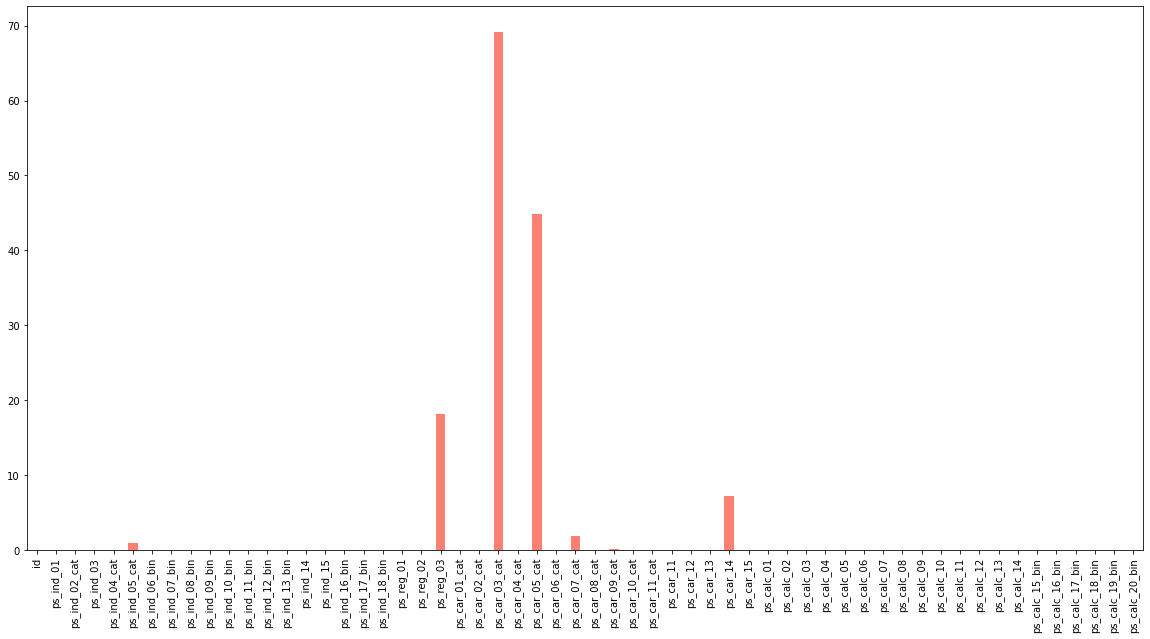

In [273]:
fig, ax = plt.subplots(figsize=(20,10))         
(test_df.isna().sum()*100/len(test_df)).round(2).plot(kind='bar', color='salmon');

In [274]:
test_data_no_id['missing'] = pd.isnull(test_data_no_id).any(axis=1)

In [275]:
(test_data_no_id['missing'] == 0).sum(axis=0)#Count of missing=0

186567

In [276]:
(test_data_no_id['missing'] == 1).sum(axis=0)#Count of missing=1

706249

In [277]:
categorical_column=[]
categorical_missing_data = []
not_categorical = []
preprocessed_test_df = preprocess_data(test_data_no_id)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [278]:
len(categorical_column), len(categorical_missing_data), len(not_categorical)

(14, 0, 27)

In [279]:
preprocessed_test_df.isna().sum()

ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [280]:
preprocessed_test_df.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'missing'],
     

In [281]:
preprocessed_test_df.columns.values

array(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat',
       'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12',
       'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',
       'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'missing']

In [282]:
preprocessed_test_df.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,missing
0,0,1.0,8,1.0,0.0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7.0,1.0,1.0,0,1.0,1,1.0,1,2.0,1,65,1.0,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1,True
1,4,2.0,5,1.0,0.0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4.0,1.0,1.0,0,0.0,11,1.0,1,0.0,1,103,1.0,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1,True
2,5,1.0,3,0.0,0.0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11.0,1.0,1.0,0,1.0,14,1.0,1,2.0,1,29,3.0,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0,True
3,0,1.0,6,0.0,0.0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,0.802730,7.0,1.0,1.0,0,1.0,1,1.0,1,2.0,1,40,2.0,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0,True
4,5,1.0,7,0.0,0.0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11.0,1.0,1.0,0,1.0,11,1.0,1,2.0,1,101,3.0,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1,True


In [291]:
shuffled_df_test=preprocessed_test_df

In [292]:
X_test_df = shuffled_df_test

len(categorical_column), len(categorical_missing_data), len(not_categorical)

(14, 0, 27)

In [293]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = categorical_column
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

In [294]:
transformed_x = transformer.fit_transform(X_test_df)
shuffled_df_encoded = pd.get_dummies(shuffled_df_test[categorical_column])

In [295]:
shuffled_cat_dropped = shuffled_df_test.drop(categorical_column, axis=1)
shuffled_cat_dropped.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,missing
0,0,8,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,1.0,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1,True
1,4,5,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,1.0,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1,True
2,5,3,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,3.0,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0,True
3,0,6,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,0.802730,2.0,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0,True
4,5,7,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,3.0,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1,True


In [296]:
shuffled_upd = pd.concat([shuffled_cat_dropped, shuffled_df_encoded], axis=1)

In [302]:
shuffled_upd.shape

(892816, 219)

In [303]:
preprocessed_test_data = shuffled_upd

In [304]:
X_test = StandardScaler().fit_transform(preprocessed_test_data)

In [305]:
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
0,-0.957649,1.328174,-0.805055,1.699460,-0.442362,-0.477868,-0.019316,-0.039969,-0.097287,-0.032257,-0.097314,1.327840,0.716796,-0.369971,-0.428245,-0.386017,-0.345627,-0.850320,-1.619186,-1.091526,-0.640988,-0.510641,0.542901,-1.217326,1.216353,0.521998,-1.227796,-0.778815,-1.265676,-0.006739,-2.208643,-0.271134,0.191591,-1.904861,-0.366699,-1.106809,1.624118,-0.375749,0.770048,0.896051,-0.635683,-0.732742,2.358067,0.513971,0.615046,-0.513286,-0.222142,-0.138824,-1.181132,1.181132,0.340386,-0.11875,-0.08579,-0.119263,-0.177808,-0.054737,-0.190339,-0.100571,-0.047525,-0.059008,-0.106559,-0.215282,-0.176389,-0.341783,1.517300,-0.160824,-0.187038,-0.301729,-0.731681,-0.452647,0.452647,-0.374415,0.374415,0.445879,-0.239531,-0.202946,-0.034688,-0.021092,-0.029665,-0.051667,-0.016087,-0.188429,-0.182648,-0.595220,0.595220,-0.476272,2.009678,-0.05316,-0.143581,-0.234957,-0.0483,-0.191615,-0.167922,-0.048078,-0.173851,-0.243817,-0.534452,-0.063672,-0.101533,-0.331629,-0.194111,-0.090097,-0.092738,-0.231899,0.231899,-0.448858,0.448858,-0.697127,-0.227315,0.825996,-0.159101,-0.0687,-0.090664,0.092257,-0.016936,-0.074264,-0.065603,-0.073575,-0.050799,-0.146204,-0.063548,-0.098598,-0.064308,-0.060407,-0.121603,-0.106166,-0.112099,-0.075489,-0.06753,-0.055737,-0.110183,-0.080856,-0.045357,-0.091657,-0.054891,-0.064035,-0.119427,-0.05196,-0.06277,-0.088645,-0.077086,-0.100809,-0.146686,-0.085571,-0.063352,-0.094231,-0.145852,-0.0563,-0.088991,-0.051262,-0.070495,-0.09275,-0.124863,-0.114407,-0.092171,-0.073374,-0.09137,-0.074667,-0.098639,-0.054147,-0.095062,-0.058152,-0.101971,-0.09629,-0.054562,-0.100792,-0.07713,-0.088901,-0.051917,-0.084542,-0.046217,-0.079354,-0.050854,-0.055168,-0.116479,-0.067471,-0.06865,-0.042622,-0.196257,7.200346,-0.073351,-0.11037,-0.11841,-0.055767,-0.113969,-0.063415,-0.069875,-0.055645,-0.089679,-0.054716,-0.066552,-0.064832,-0.111652,-0.059133,-0.097122,-0.049417,-0.13375,-0.126198,-0.091314,-0.103844,-0.079183,-0.172386,-0.086889,-0.093271,-0.093521,-0.055229,-0.105555,-0.069477,-0.075143,-0.078109,-0.058481,-0.049792,-0.069306,-0.1445,-0.087313,-0.112083,-0.058345,-0.207340,-0.408922
1,1.055941,0.217124,-0.805055,-0.588422,-0.442362,2.092628,-0.019316,-0.039969,-0.097287,-0.032257,-0.097314,-0.648475,0.716796,-0.369971,-0.428245,1.004326,0.148594,-0.339148,-1.619186,-1.091526,-0.922315,-0.369786,-0.329076,-0.172805,0.172414,-0.174250,0.562790,0.980567,0.234114,0.699897,0.530034,-0.271134,-0.496555,-1.475691,-1.199602,0.073779,0.895754,-0.375749,-1.298620,0.896051,1.573112,-0.732742,2.358067,0.513971,-1.625896,1.948230,-0.222142,-0.138824,-1.181132,1.181132,0.340386,-0.11875,-0.08579,-0.119263,-0.177808,-0.054737,-0.190339,-0.100571,-0.047525,-0.059008,-0.106559,4.645067,-0.176389,-0.341783,-0.659065,-0.160824,-0.187038,-0.301729,-0.731681,-0.452647,0.452647,-0.374415,0.374415,0.445879,-0.239531,-0.202946,-0.034688,-0.021092,-0.029665,-0.051667,-0.016087,-0.188429,-0.182648,1.680052,-1.680052,-0.476272,-0.497592,-0.05316,-0.143581,-0.234957,-0.0483,-0.191615,-0.167922,-0.048078,-0.173851,-0.243817,1.871075,-0.063672,-0.101533,-0.331629,-0.194111,-0.090097,-0.092738,-0.231899,0.231899,-0.448858,0.448858,1.434459,-0.227315,-1.210659,-0.159101,-0.0687,-0.09

In [306]:
test_pred = xgb_refit.predict_proba(X_test)

In [307]:
test_pred[:,1][:20]

array([0.03331957, 0.03353829, 0.04221655, 0.02722894, 0.04501128,
       0.05203511, 0.03912896, 0.04887601, 0.06698701, 0.06221914,
       0.03788291, 0.03552667, 0.04681031, 0.05360783, 0.04971734,
       0.03155053, 0.03689193, 0.05351051, 0.02421255, 0.05770255],
      dtype=float32)

In [308]:
test_pred2 = xgb_refit.predict_proba(X_test)

In [310]:
X_test.shape

(892816, 219)

In [311]:
test_pred2.shape

(892816, 2)

In [312]:
X_test.columns.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [313]:
PIC_Submission = pd.DataFrame(test_pred2[:,1], columns=['target'], index=np.arange(0,len(preprocessed_test_data)))

In [314]:
PIC_Submission.tail()

,target
892811,0.078156
892812,0.049301
892813,0.044775
892814,0.036914
892815,0.038052


In [315]:
len(PIC_Submission)

892816

In [316]:
PIC_Submission.shape

(892816, 1)

In [317]:
PIC_Submission.to_csv('submit_test_without_fs.csv')

## select the top features based on variable importance

In [325]:
from matplotlib import pyplot

In [354]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df_20=fi_df.head(20)
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df_20['feature_importance'], y=fi_df_20['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


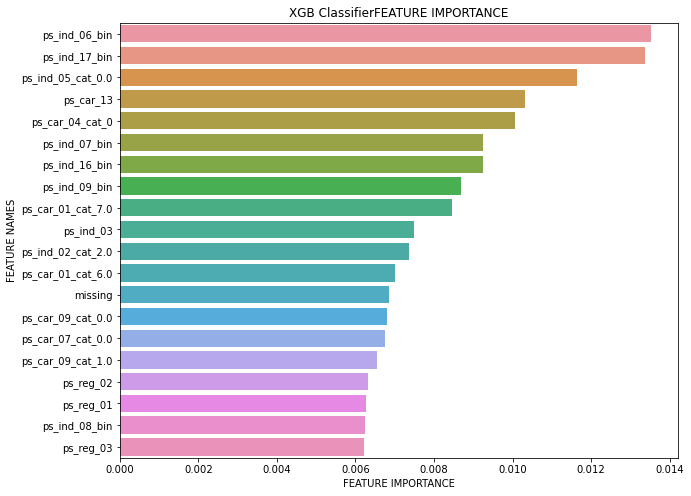

In [355]:
plot_feature_importance(xgb_refit.feature_importances_,shuffled_upd.columns,'XGB Classifier') 

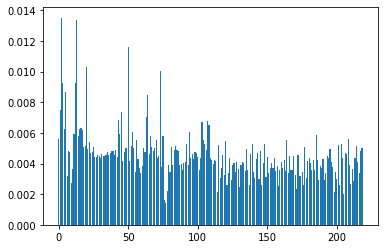

In [357]:
# plot
pyplot.bar(range(len(xgb_refit.feature_importances_)), xgb_refit.feature_importances_)
pyplot.show()

THE END 